<a href="https://colab.research.google.com/github/alexa12mora/AnalisisDatos/blob/Alexa/GraficosProyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
datos= pd.read_csv("/DatosV1.csv")

In [22]:
df=datos.rename(columns={
    "iso3":"COD",
    "country":"PAIS",
    "year":"AÑO",
    "mmr":"MORTALIDAD_MATERNA",
    "bas":"PARTOS_ATENDIDOS",
    "under5mr":"TASA_MORTALIDAD_MENOR5AÑOS",
    "nmr":"MORTALIDAD_NEONATAL",
    "hiv":"INFECCIONES_VIH",
    "unc_prob":"PROBABILIDAD_MORTALIDAD",
    "alcohol":"CONSUMO_ALCOHOL_MAYOR15AÑOS",
    "contraceptive":"USO_ANTICONCEPTIVOS",
    "abr":"FECUNDIDAD_ADOLESCENTES",
    "dpt":"VACUNACION_DPT",
    "vaccination":"VACUNACION_SARAMPION"
})

Text(0, 0.5, 'País')

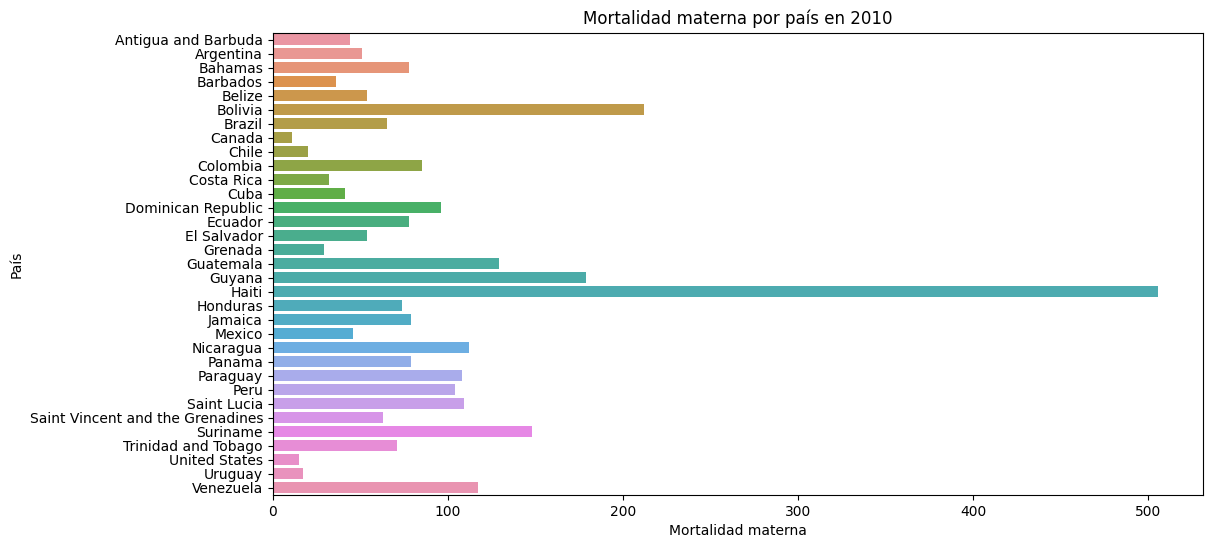

In [62]:
#Indica el país con mayor índice de mortalidad materna  por pais en america latina y el caribe
plt.figure(figsize=(12,6))
sns.barplot(x='MORTALIDAD_MATERNA', y='PAIS', data=df[df.AÑO == 2010])
plt.title('Mortalidad materna por país en 2010')
plt.xlabel('Mortalidad materna')
plt.ylabel('País')

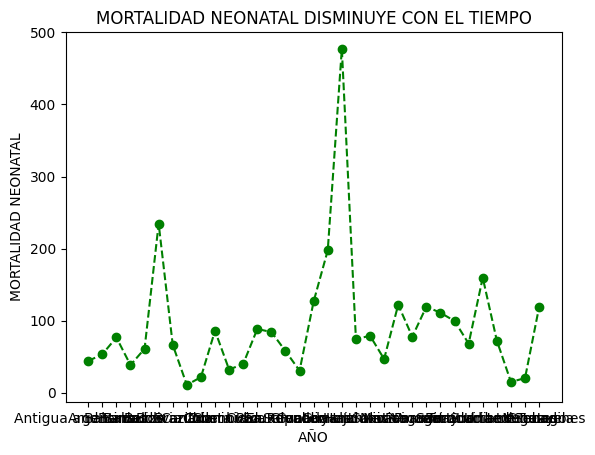

In [63]:
valor_por_año=df.groupby("AÑO")["MORTALIDAD_NEONATAL"].sum()
plt.title("MORTALIDAD NEONATAL DISMINUYE CON EL TIEMPO")
plt.xlabel("AÑO")
plt.ylabel("MORTALIDAD NEONATAL")
plt.plot(valor_por_ciudad,"og--")

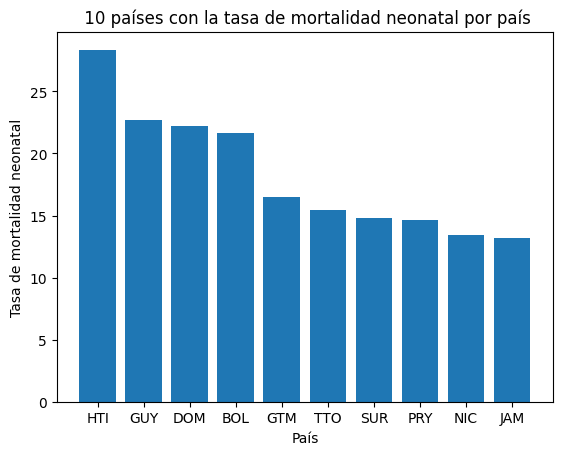

In [65]:
#agrupamos los datos por país para obtener la tasa de mortalidad neonatal promedio. Luego, seleccionamos los 10 países con la tasa más alta y los graficamos en un gráfico de barras.
neonatal = df.groupby('COD')['MORTALIDAD_NEONATAL'].mean().sort_values(ascending=False)[:10]
plt.bar(neonatal.index, neonatal.values)
plt.title(' 10 países con la tasa de mortalidad neonatal por país')
plt.xlabel('País')
plt.ylabel('Tasa de mortalidad neonatal')
plt.show()

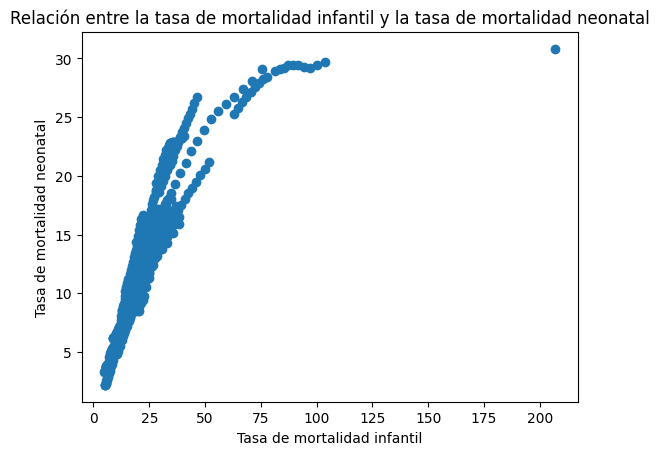

In [66]:
#Muestra la relación entre la tasa de mortalidad infantil y la tasa de mortalidad neonatal
data = df[['MORTALIDAD_NEONATAL', 'TASA_MORTALIDAD_MENOR5AÑOS']]
fig, ax = plt.subplots()
ax.scatter(data['TASA_MORTALIDAD_MENOR5AÑOS'], data['MORTALIDAD_NEONATAL'])
ax.set_xlabel('Tasa de mortalidad infantil')
ax.set_ylabel('Tasa de mortalidad neonatal')
ax.set_title('Relación entre la tasa de mortalidad infantil y la tasa de mortalidad neonatal')
plt.show()

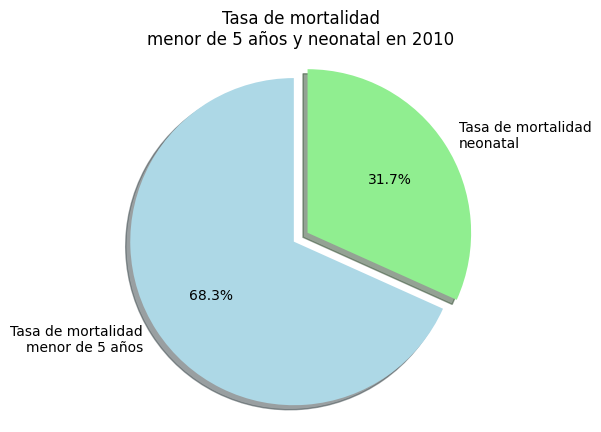

In [67]:
# gráfico de pastel que muestra la proporción de la tasa de mortalidad de menores de 5 años y la mortalidad neonatal en tus datos
df_2010 = df[df["AÑO"] == 2010]
tasa_mortalidad_menor5 = df_2010["TASA_MORTALIDAD_MENOR5AÑOS"].sum()
tasa_mortalidad_neonatal = df_2010["MORTALIDAD_NEONATAL"].sum()
labels = ["Tasa de mortalidad\nmenor de 5 años", "Tasa de mortalidad\nneonatal"]
sizes = [tasa_mortalidad_menor5, tasa_mortalidad_neonatal]
colors = ["lightblue", "lightgreen"]
explode = (0.1, 0)
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis("equal")
ax.set_title("Tasa de mortalidad\nmenor de 5 años y neonatal en 2010")
plt.show()

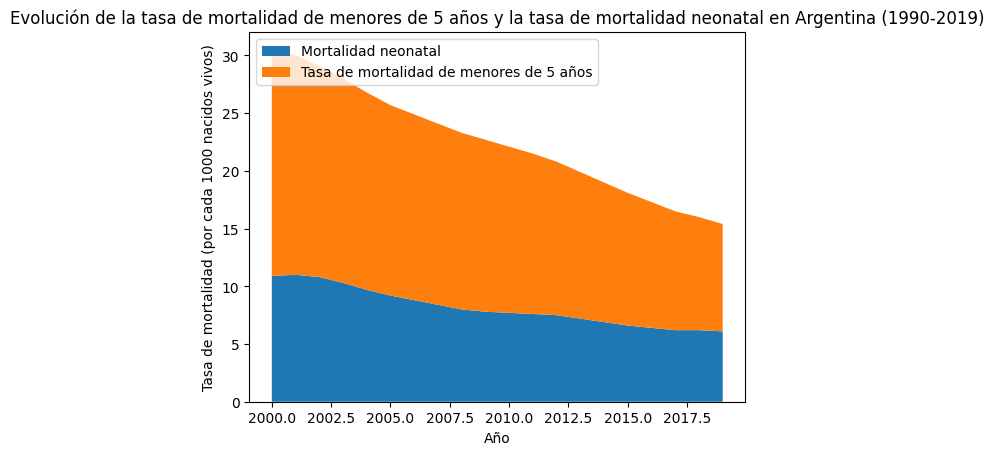

In [55]:
#gráfico de área apilada que muestra la evolución de la tasa de mortalidad de menores de 5 años y la tasa de mortalidad neonatal en un país específico durante un período de tiempo determinado
# Cargar los datos
argentina = df.loc[(df["PAIS"] == "Argentina") & (df["AÑO"] >= 1990) & (df["AÑO"] <= 2019), ["AÑO", "TASA_MORTALIDAD_MENOR5AÑOS", "MORTALIDAD_NEONATAL"]]
plt.stackplot(argentina["AÑO"], argentina["MORTALIDAD_NEONATAL"], argentina["TASA_MORTALIDAD_MENOR5AÑOS"], labels=["Mortalidad neonatal", "Tasa de mortalidad de menores de 5 años"])
plt.legend(loc="upper left")
plt.xlabel("Año")
plt.ylabel("Tasa de mortalidad (por cada 1000 nacidos vivos)")
plt.title("Evolución de la tasa de mortalidad de menores de 5 años y la tasa de mortalidad neonatal en Argentina (1990-2019)")
plt.show()

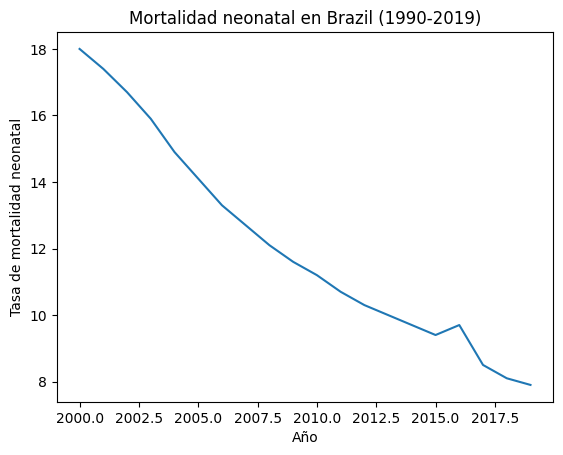

In [60]:
#El resultado será un gráfico que muestra la evolución de la tasa de mortalidad de menores de 5 años y la tasa de mortalidad neonatal 
# Seleccionar país y rango de años
pais = "Brazil"
inicio = 1990
fin = 2019
datos_pais = df.loc[(df["PAIS"] == pais) & (df["AÑO"] >= inicio) & (df["AÑO"] <= fin)]
fig, ax = plt.subplots()
ax.plot(datos_pais["AÑO"], datos_pais["MORTALIDAD_NEONATAL"])
ax.set_title(f"Mortalidad neonatal en {pais} ({inicio}-{fin})")
ax.set_xlabel("Año")
ax.set_ylabel("Tasa de mortalidad neonatal")

plt.show()

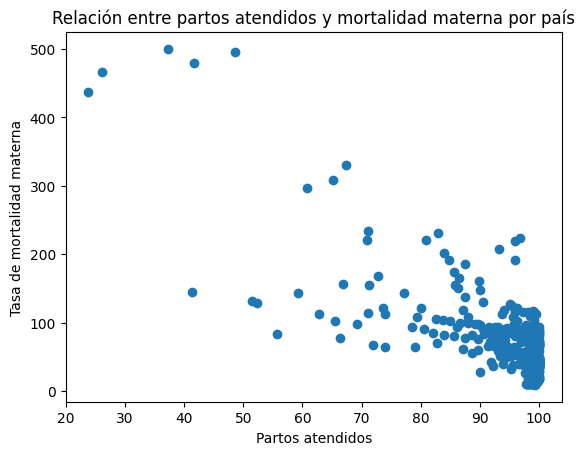

In [71]:
#Este gráfico puede ayudar a visualizar si existe alguna correlación entre la cantidad de partos atendidos y la tasa de mortalidad materna en los diferentes países.
plt.scatter(df['PARTOS_ATENDIDOS'], df['MORTALIDAD_MATERNA'])
plt.xlabel('Partos atendidos')
plt.ylabel('Tasa de mortalidad materna')
plt.title('Relación entre partos atendidos y mortalidad materna por país')
plt.show()